In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import RidgeCV

In [4]:
data = pd.read_hdf("Datasets/PubChemDF_new.h5","data")

In [5]:
data.columns

Index([u'Unnamed: 0', u'CID', u'smiles_parent', u'inchi', u'1159524PHENOTYPE',
       u'1159524_EFFICACY', u'1159524_OUTCOME', u'1159524_POTENCY',
       u'1159524_SCORE', u'588856PHENOTYPE', u'588856_EFFICACY',
       u'588856_OUTCOME', u'588856_POTENCY', u'588856_SCORE',
       u'602332PHENOTYPE', u'602332_EFFICACY', u'602332_OUTCOME',
       u'602332_POTENCY', u'602332_SCORE', u'624170PHENOTYPE',
       u'624170_EFFICACY', u'624170_OUTCOME', u'624170_POTENCY',
       u'624170_SCORE', u'624173PHENOTYPE', u'624173_EFFICACY',
       u'624173_OUTCOME', u'624173_POTENCY', u'624173_SCORE',
       u'624263PHENOTYPE', u'624263_EFFICACY', u'624263_OUTCOME',
       u'624263_POTENCY', u'624263_SCORE', u'652048PHENOTYPE',
       u'652048_EFFICACY', u'652048_OUTCOME', u'652048_POTENCY',
       u'652048_SCORE', u'686978PHENOTYPE', u'686978_EFFICACY',
       u'686978_OUTCOME', u'686978_POTENCY', u'686978_SCORE',
       u'686979PHENOTYPE', u'686979_EFFICACY', u'686979_OUTCOME',
       u'686979_POTE

In [6]:
data.head()

,Unnamed: 0,CID,smiles_parent,inchi,1159524PHENOTYPE,1159524_EFFICACY,1159524_OUTCOME,1159524_POTENCY,1159524_SCORE,588856PHENOTYPE,...,686979PHENOTYPE,686979_EFFICACY,686979_OUTCOME,686979_POTENCY,686979_SCORE,743266PHENOTYPE,743266_EFFICACY,743266_OUTCOME,743266_POTENCY,743266_SCORE
0,0,6603008.0,CCOCCCNCC(=O)Nc1ccc(OC(F)(F)F)cc1,JDJXVIDQGFMBLJ-UHFFFAOYSA-N,Inactive,NaN,Inactive,NaN,0.0,Inactive,...,Inactive,NaN,Inactive,NaN,0.0,Inactive,NaN,Inactive,NaN,0.0
1,1,6602571.0,COCCn1nnnc1CN1CCC(Cc2ccccc2)CC1,YUFJVPXLDSAWIC-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,Cytotoxic,...,Inactive,NaN,Inactive,NaN,0.0,Inactive,NaN,Inactive,NaN,0.0
2,2,6602616.0,COCCn1nnnc1CN1CCC(O)(c2cccc(C(F)(F)F)c2)CC1,OOGABMQFAKYYBW-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,Inactive,...,Inactive,NaN,Inactive,NaN,0.0,Inactive,NaN,Inactive,NaN,0.0
3,3,644371.0,O=C(CN1CCCCCC1)NCCc1ccc(F)cc1,JHEKGAIZRVGERM-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,Inactive,...,Inactive,NaN,Inactive,NaN,0.0,Inactive,NaN,Inactive,NaN,0.0
4,4,6603132.0,COc1ccc(C(=O)C(c2ccccc2)N2CCOCC2)cc1,QMFVJCSHYOSQRY-UHFFFAOYSA-N,Inactive,NaN,Inactive,NaN,0.0,Inactive,...,Inactive,NaN,Inactive,NaN,0.0,Inactive,NaN,Inactive,NaN,0.0


In [8]:
import h5py

hdf = h5py.File('Datasets/PubChemDF_fp_array_new.h5','r')

In [140]:
X = hdf['fp_array'][:]

In [74]:
assays = [1159524, 588856, 602332, 624170, 624173, 624263,652048 , 686978, 686979, 743266]
assay = assays[8] #8 is large with some distribution of the scores
score = '_SCORE'
target = '_POTENCY'

In [75]:
scores = data[str(assay)+score]

In [76]:
#scores = scores[~scores.isnull()]

In [77]:
for i in range(0,99,10):
    print("%i larger than %i"%(np.sum(scores > i), i))

156598 larger than 0
60794 larger than 10
59064 larger than 20
48783 larger than 30
47117 larger than 40
9740 larger than 50
9740 larger than 60
9740 larger than 70
9740 larger than 80
659 larger than 90


In [85]:
sel_mask = scores > 50

In [141]:
X_sel = X[sel_mask]

In [87]:
X_sel.shape

(9740, 8192)

In [88]:
y_sel = data[str(assay)+ target][sel_mask]

In [89]:
y_sel = np.log(y_sel)

In [90]:
y_sel.isnull().sum()

0

{'Found Alpha': 85.079427996274532,
 'Low var features': 917,
 'PCA explained variance': 0.83513136217167894,
 'Test RMSE': 57.660182729231622,
 'Test R^2': 0.17713887508218207,
 'Train R^2': 0.23642273034037431}

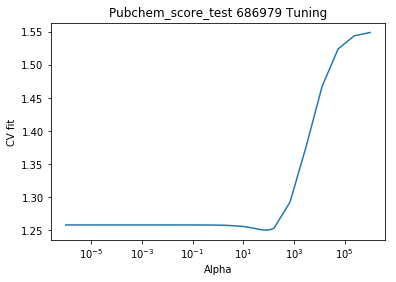

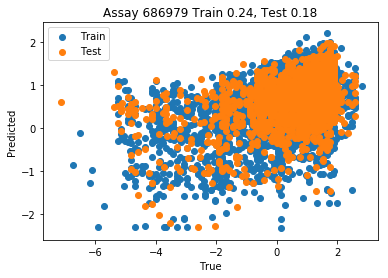

In [91]:
results = {}
prefix = 'Pubchem_score_test'

#Remove features with low variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.01)
X_red = vt.fit_transform(X_sel)
#X_test_red = vt.transform(X_test)
results["Low var features"] = X_red.shape[1]

#Split in train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_red, y_sel, test_size=0.25, random_state=42)

#Dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


results["PCA explained variance"] = np.sum(pca.explained_variance_ratio_)

#first round of CV grid search
alphas = np.logspace(6,-6, 20)
#L2 regularized multiple linear regression
regr = RidgeCV(alphas=alphas,store_cv_values=True)#, scoring='r2')
regr.fit(X_train,y_train)

test_scores = np.mean(regr.cv_values_, axis = 0)
best_idx = np.argmin(test_scores)
#Second round of CV grid search
zoom_alphas = np.logspace(np.log10(alphas[best_idx-1]), np.log10(alphas[best_idx+1]), 10)
regr = RidgeCV(alphas=zoom_alphas, store_cv_values=True)#, scoring='r2')
regr.fit(X_train,y_train)

#Combine and plot
x_axis = np.concatenate([alphas, zoom_alphas])
sortidx = np.argsort(x_axis)
test_scores = np.concatenate([test_scores, np.mean(regr.cv_values_, axis=0)])

plt.figure()
plt.plot(x_axis[sortidx], test_scores[sortidx])
plt.xscale('log')
#plt.yscale('log')
plt.title("%s %s Tuning"%(prefix,assay))
plt.xlabel("Alpha")
plt.ylabel("CV fit")
#plt.savefig("Images/%s%s_tuning.png"%(prefix, assay))


results["Found Alpha"] = regr.alpha_

plt.figure()                         
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

score_train = regr.score(X_train,y_train)
score_test = regr.score(X_test,y_test)

rmse_test = (np.sum((y_test - y_test_pred)**2))**0.5

results["Train R^2"] = score_train
results["Test R^2"] = score_test
results["Test RMSE"] = rmse_test

plt.scatter(y_train,y_train_pred, label="Train")
plt.scatter(y_test, y_test_pred, label="Test")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Assay %s Train %0.2F, Test %0.2F"%(assay, score_train, score_test))
plt.legend()
#plt.savefig("Images/%s%s_scatter.png"%(prefix, assay))

results

In [238]:
help(RidgeCV)

Help on class RidgeCV in module sklearn.linear_model.ridge:

class RidgeCV(_BaseRidgeCV, sklearn.base.RegressorMixin)
 |  Ridge regression with built-in cross-validation.
 |  
 |  By default, it performs Generalized Cross-Validation, which is a form of
 |  efficient Leave-One-Out cross-validation.
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alphas : numpy array of shape [n_alphas]
 |      Array of alpha values to try.
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as
 |      LogisticRegression or LinearSVC.
 |  
 |  fit_intercept : boolean
 |      Whether to calculate the intercept for this model. If set
 |      to false, no intercept will be used in calculations
 |      (e.g. data is expecte

## Test of adding more but lower scored data

In [114]:
test_threshold = 90
sel_mask = scores > test_threshold
y_sel = data[str(assay)+ target][sel_mask]
y_sel = np.log(y_sel)

(array([   3.,    3.,   21.,   57.,   81.,   89.,   93.,  184.,   94.,   34.]),
 array([-7.13089883, -6.44917049, -5.76744216, -5.08571382, -4.40398548,
        -3.72225714, -3.0405288 , -2.35880047, -1.67707213, -0.99534379,
        -0.31361545]),
 <a list of 10 Patch objects>)

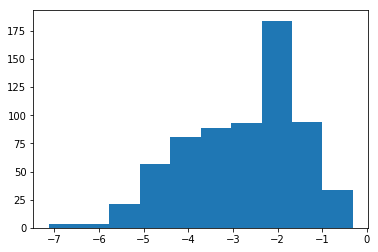

In [115]:
plt.hist(y_sel)

In [131]:
train_mask = ( 90 > scores ) & (scores > 40)

(array([  2.00000000e+00,   4.00000000e+00,   8.00000000e+00,
          4.40000000e+01,   4.14000000e+02,   1.36100000e+03,
          3.11100000e+03,   6.69400000e+03,   2.30740000e+04,
          1.15440000e+04]),
 array([-4.80362112, -3.94455545, -3.08548978, -2.22642411, -1.36735844,
        -0.50829277,  0.3507729 ,  1.20983857,  2.06890424,  2.92796991,
         3.78703558]),
 <a list of 10 Patch objects>)

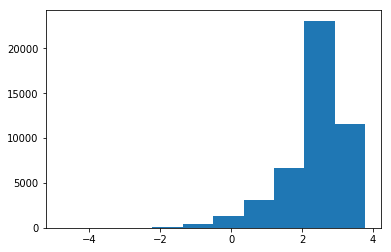

In [132]:
y_train_extra = data[str(assay)+ target][train_mask]
y_train_extra = np.log(y_train_extra)
plt.hist(y_train_extra)

In [133]:
#Not same distribution, so will have to split the best set.

In [134]:
X_sel  = X[sel_mask]

In [135]:
#Split in train-test
from sklearn.model_selection import train_test_split
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y_sel, test_size=0.25, random_state=42)


In [142]:
X_train_extra = X[train_mask]

In [137]:
#Concatenate "bad" data with good data
X_concat = np.concatenate([X_sel_train, X_train_extra], axis = 0)
y_concat = np.concatenate([y_sel_train, y_train_extra], axis = 0)

In [138]:
X_train_extra.shape

(46256, 8192)

{'Found Alpha': 138.14999616383238,
 'Low var features': 959,
 'PCA explained variance': 0.81444308930116349,
 'Test RMSE': 58.084857929671735,
 'Test R^2': -12.844623220259095,
 'Train R^2': 0.13393094267743788}

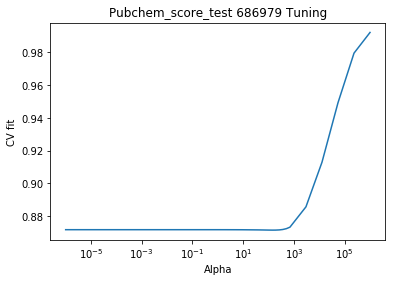

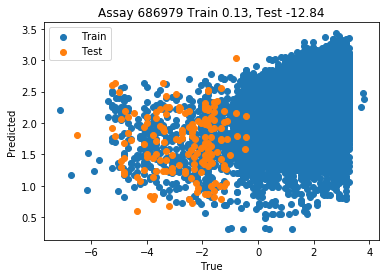

In [139]:
results = {}
prefix = 'Pubchem_score_test'

#Remove features with low variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.01)
X_red = vt.fit_transform(X_concat)
X_test_red = vt.transform(X_sel_test)
results["Low var features"] = X_red.shape[1]


#Dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
X_train = pca.fit_transform(X_red)
X_test = pca.transform(X_test_red)

y_train = y_concat
y_test = y_sel_test

results["PCA explained variance"] = np.sum(pca.explained_variance_ratio_)

#first round of CV grid search
alphas = np.logspace(6,-6, 20)
#L2 regularized multiple linear regression
regr = RidgeCV(alphas=alphas,store_cv_values=True)#, scoring='r2')
regr.fit(X_train,y_train)

test_scores = np.mean(regr.cv_values_, axis = 0)
best_idx = np.argmin(test_scores)
#Second round of CV grid search
zoom_alphas = np.logspace(np.log10(alphas[best_idx-1]), np.log10(alphas[best_idx+1]), 10)
regr = RidgeCV(alphas=zoom_alphas, store_cv_values=True)#, scoring='r2')
regr.fit(X_train,y_train)

#Combine and plot
x_axis = np.concatenate([alphas, zoom_alphas])
sortidx = np.argsort(x_axis)
test_scores = np.concatenate([test_scores, np.mean(regr.cv_values_, axis=0)])

plt.figure()
plt.plot(x_axis[sortidx], test_scores[sortidx])
plt.xscale('log')
#plt.yscale('log')
plt.title("%s %s Tuning"%(prefix,assay))
plt.xlabel("Alpha")
plt.ylabel("CV fit")
#plt.savefig("Images/%s%s_tuning.png"%(prefix, assay))


results["Found Alpha"] = regr.alpha_

plt.figure()                         
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

score_train = regr.score(X_train,y_train)
score_test = regr.score(X_test,y_test)

rmse_test = (np.sum((y_test - y_test_pred)**2))**0.5

results["Train R^2"] = score_train
results["Test R^2"] = score_test
results["Test RMSE"] = rmse_test

plt.scatter(y_train,y_train_pred, label="Train")
plt.scatter(y_test, y_test_pred, label="Test")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Assay %s Train %0.2F, Test %0.2F"%(assay, score_train, score_test))
plt.legend()
#plt.savefig("Images/%s%s_scatter.png"%(prefix, assay))

results

#### Thing just get worse, when adding the extra data!

In [8]:
assays = [1614421,1614364,1613933,1909116,1909123,1909130,1909187,1909186,1909184,1909194,1909195,1909196,2328568,1794557,3706373,3705123,1614063,3705488,3705362,2218781]

# Test of all datasets at threshold 90

In [ ]:
assays = [1159524, 588856, 602332, 624170, 624173, 624263,652048 , 686978, 686979, 743266]
score = '_SCORE'
target = '_POTENCY'

In [52]:
prefix = "PubChem_"

In [ ]:
assay = assays[8] #8 is large with some distribution of the scores


In [158]:
def test_assay(assay, collector, thr  = 80):
    results = {}
    #Get scores
    scores = data[str(assay)+score]
    selmask = scores > thr
    
    #Get y_data
    y_all = data[str(assay)+  target][selmask]
    
    #Identify rows that are not null/NaN
    mask = ~y_all.isnull()
    results["Datapoints"] = np.sum(mask)
    print(results['Datapoints'])

    if results["Datapoints"] < 100:
        results["Error"] = "To little data, %i"%results["Datapoints"]
        collector[assay] = results
        return collector
    
    
    try:
        y = np.log(y_all[mask])
    except:
        print("Fail")
        results["Error"] = "Fail" #TODO give exception type
        collector[assay] = results
        return collector
    
    plt.figure()
    plt.hist(y)
    plt.title("%s %s Y values"%(prefix,assay))
    plt.savefig("Images/%s%s_yhist.png"%(prefix, assay))

    #Get X-data
    X_sel = X[selmask][mask]

    #Remove features with low variance
    from sklearn.feature_selection import VarianceThreshold
    vt = VarianceThreshold(0.01)
    X_red = vt.fit_transform(X_sel)
    results["Low var features"] = X_red.shape[1]

    #Split in train-test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.1, random_state=42)

    #Dimension reduction
    from sklearn.decomposition import PCA
    pca = PCA(n_components=250)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    results["PCA explained variance"] = np.sum(pca.explained_variance_ratio_)

    #first round of CV grid search
    alphas = np.logspace(6,-6, 20)
    #L2 regularized multiple linear regression
    regr = RidgeCV(alphas=alphas,store_cv_values=True)
    regr.fit(X_train,y_train)

    test_scores = np.mean(regr.cv_values_, axis = 0)
    best_idx = np.argmin(test_scores)
    #Second round of CV grid search
    zoom_alphas = np.logspace(np.log10(alphas[best_idx-1]), np.log10(alphas[best_idx+1]), 10)
    regr = RidgeCV(alphas=zoom_alphas, store_cv_values=True)
    regr.fit(X_train,y_train)

    #Combine and plot
    x_axis = np.concatenate([alphas, zoom_alphas])
    sortidx = np.argsort(x_axis)
    test_scores = np.concatenate([test_scores, np.mean(regr.cv_values_, axis=0)])

    plt.figure()
    plt.plot(x_axis[sortidx], test_scores[sortidx])
    plt.xscale('log')
    plt.title("%s %s Tuning"%(prefix,assay))
    plt.xlabel("Alpha")
    plt.ylabel("CV fit")
    plt.savefig("Images/%s%s_tuning.png"%(prefix, assay))


    results["Found Alpha"] = regr.alpha_

    plt.figure()                         
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    score_train = regr.score(X_train,y_train)
    score_test = regr.score(X_test,y_test)
    
    results["Train R^2"] = score_train
    results["Test R^2"] = score_test

    plt.scatter(y_train,y_train_pred, label="Train")
    plt.scatter(y_test, y_test_pred, label="Test")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("Assay %s Train %0.2F, Test %0.2F"%(assay, score_train, score_test))
    plt.legend()
    plt.savefig("Images/%s%s_scatter.png"%(prefix, assay))
    
    
    
    collector[assay ] = results
    return collector

342
401
3
91
44
249
0
10685
9740
17


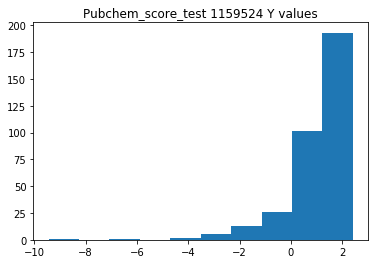

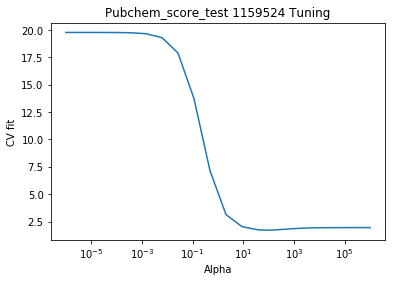

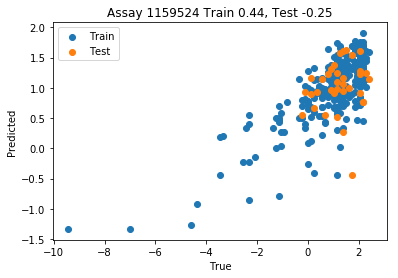

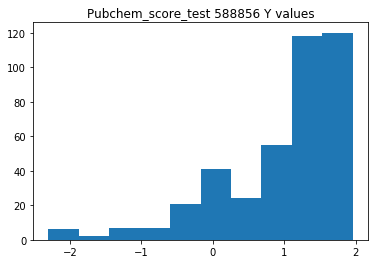

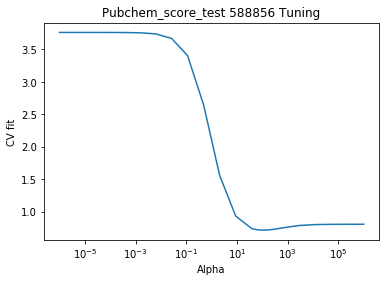

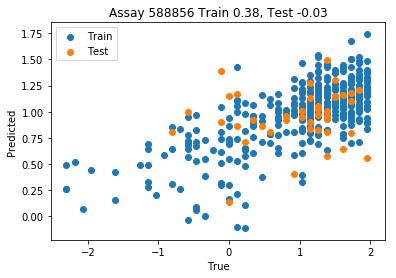

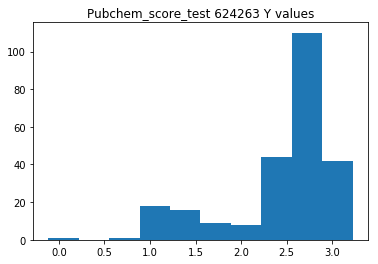

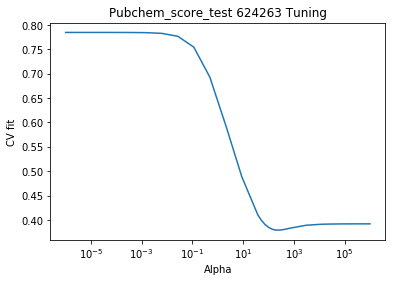

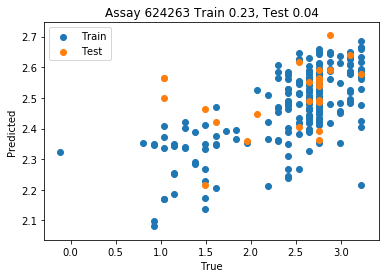

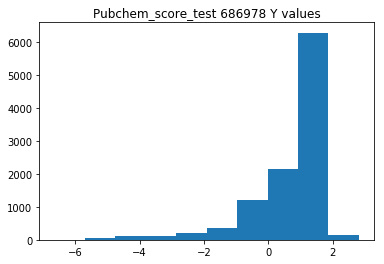

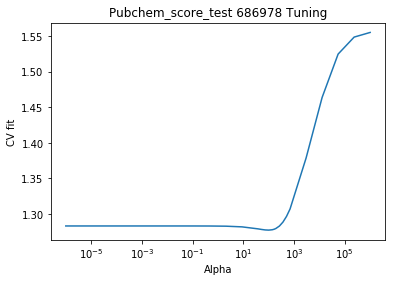

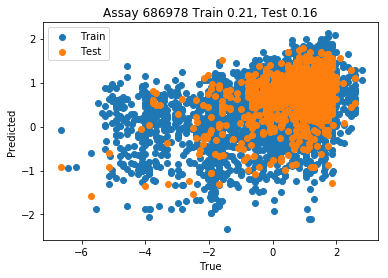

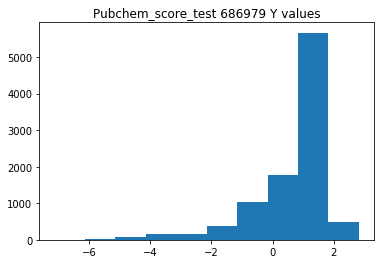

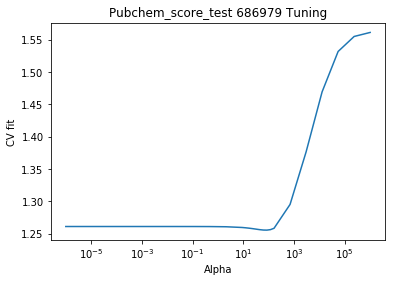

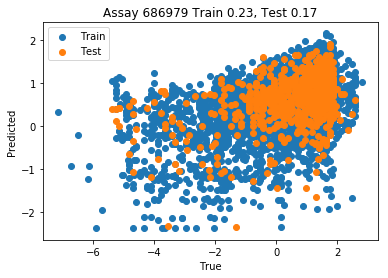

In [159]:
collector = {}
for assay in assays:
    collector = test_assay(assay, collector)

In [160]:
results = pd.DataFrame(collector).T
results

,Datapoints,Error,Found Alpha,Low var features,PCA explained variance,Test R^2,Train R^2
588856,401,NaN,100,971,0.979625,-0.0339108,0.37599
602332,3,"To little data, 3",NaN,NaN,NaN,NaN,NaN
624170,91,"To little data, 91",NaN,NaN,NaN,NaN,NaN
624173,44,"To little data, 44",NaN,NaN,NaN,NaN,NaN
624263,249,NaN,263.665,1252,1,0.0364258,0.229847
652048,0,"To little data, 0",NaN,NaN,NaN,NaN,NaN
686978,10685,NaN,100,936,0.829182,0.164453,0.2133
686979,9740,NaN,85.0794,917,0.833756,0.165988,0.233408
743266,17,"To little data, 17",NaN,NaN,NaN,NaN,NaN
1159524,342,NaN,100,1181,0.98758,-0.245275,0.438962


In [161]:
results.to_excel("Pubchem_evaluation.xls")